# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

# Assignment

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [60]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [61]:
df["Date"] = df["Date"].astype('datetime64[D]')

In [62]:
df.sort_values(by="Date", ascending=True, inplace=True)

In [63]:
df["Data_Value"] = df["Data_Value"] / 10

In [65]:
df.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17153,USC00207320,2005-01-01,TMAX,15.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4
10073,USW00014833,2005-01-01,TMAX,3.3


## 1).

In [38]:
# return a figure with the highest and lowest temperatures for each day of the year from 2005 to 2014.

In [75]:
temp_min = df[(df["Element"]=="TMIN") & (df["Date"]<="2014")][["Date","Data_Value"]]
temp_min["day of year"] = temp_min["Date"].dt.strftime("%m-%d")
temp_min_day = temp_min.groupby("day of year").agg({"Data_Value":np.min})
temp_min_day["day of year"] = temp_min_day.index
temp_min_day = temp_min_day[temp_min_day["day of year"] != "02-29"]
temp_min_day.drop("day of year", axis=1, inplace=True)
temp_min_day.head()

,Data_Value
day of year,
01-01,-16.0
01-02,-21.0
01-03,-24.9
01-04,-20.0
01-05,-15.0


In [76]:
temp_max = df[(df["Element"]=="TMAX") & (df["Date"]<="2014")][["Date","Data_Value"]]
temp_max["day of year"] = temp_max["Date"].dt.strftime("%m-%d")
temp_max_day = temp_max.groupby("day of year").agg({"Data_Value":np.max})
temp_max_day["day of year"] = temp_max_day.index
temp_max_day = temp_max_day[temp_max_day["day of year"] != "02-29"]
temp_max_day.drop("day of year", axis=1, inplace=True)
temp_max_day.head()

,Data_Value
day of year,
01-01,15.6
01-02,13.9
01-03,13.3
01-04,10.6
01-05,12.8


In [77]:
temp_min_plot = [list(range(365)),list(temp_min_day["Data_Value"])]
temp_max_plot = [list(range(365)),list(temp_max_day["Data_Value"])]

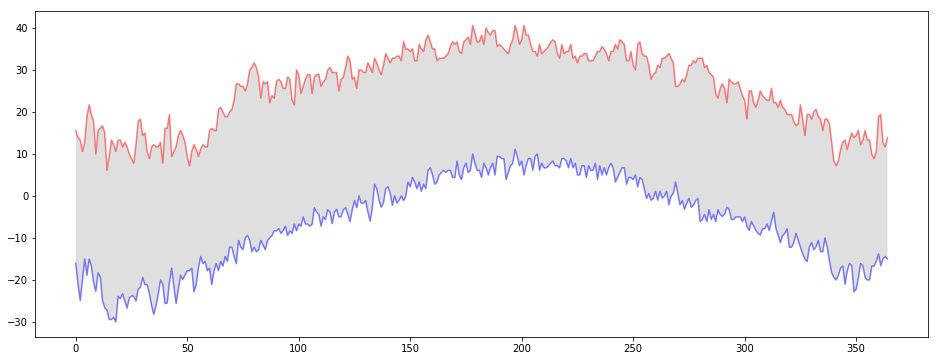

In [78]:
plt.figure(figsize=(16,6))
plt.plot(temp_min_plot[0], temp_min_plot[1], 'b', temp_max_plot[0], temp_max_plot[1], 'r', alpha=0.5)
plt.gca().fill_between(range(len(temp_min_plot[0])), temp_min_plot[1], temp_max_plot[1], facecolor='gray', alpha=0.25)
plt.show()

## 2).
Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

In [81]:
min2015 = df[(df["Element"]=="TMIN") & (df["Date"]>="2015")][["Date","Data_Value"]]
min2015["day of year"] = min2015["Date"].dt.strftime("%m-%d")
min2015_day = min2015.groupby("day of year").agg({"Data_Value":np.min})

max2015 = df[(df["Element"]=="TMAX") & (df["Date"]>="2015")][["Date","Data_Value"]]
max2015["day of year"] = max2015["Date"].dt.strftime("%m-%d")
max2015_day = max2015.groupby("day of year").agg({"Data_Value":np.max})

df_2015 = pd.merge(min2015_day, max2015_day, how="outer", left_index=True, right_index=True)
df_2015.columns = ["Min 2015","Max 2015"]

df_2005_2014 = pd.merge(temp_min_day, temp_max_day, how="outer", left_index=True, right_index=True)
df_2005_2014.columns = ["Min 2005-2014","Max 2005-2014"]

df_comp = pd.merge(df_2005_2014, df_2015, how="outer", left_index=True, right_index=True)

df_comp["day of year"] = df_comp.index
df_comp = df_comp[df_comp["day of year"] != "02-29"]
df_comp.drop("day of year", axis=1, inplace=True)
df_comp["day number"] = range(0,len(df_comp))
df_comp.head()

,Min 2005-2014,Max 2005-2014,Min 2015,Max 2015,day number
day of year,,,,,
01-01,-16.0,15.6,-13.3,1.1,0
01-02,-21.0,13.9,-12.2,3.9,1
01-03,-24.9,13.3,-6.7,3.9,2
01-04,-20.0,10.6,-8.8,4.4,3
01-05,-15.0,12.8,-15.5,2.8,4


In [82]:
record_high = df_comp[df_comp["Max 2015"] > df_comp["Max 2005-2014"]][["Max 2015","day number"]]
record_high.head()

,Max 2015,day number
day of year,,
02-09,8.3,39
04-17,27.8,106
05-07,30.6,126
05-08,33.3,127
05-09,31.1,128


In [83]:
record_low = df_comp[df_comp["Min 2015"] < df_comp["Min 2005-2014"]][["Min 2015","day number"]]
record_low.head()

,Min 2015,day number
day of year,,
01-05,-15.5,4
01-07,-18.2,6
01-08,-21.1,7
01-11,-20.0,10
02-03,-23.8,33


In [84]:
# need to convert index into datetime...

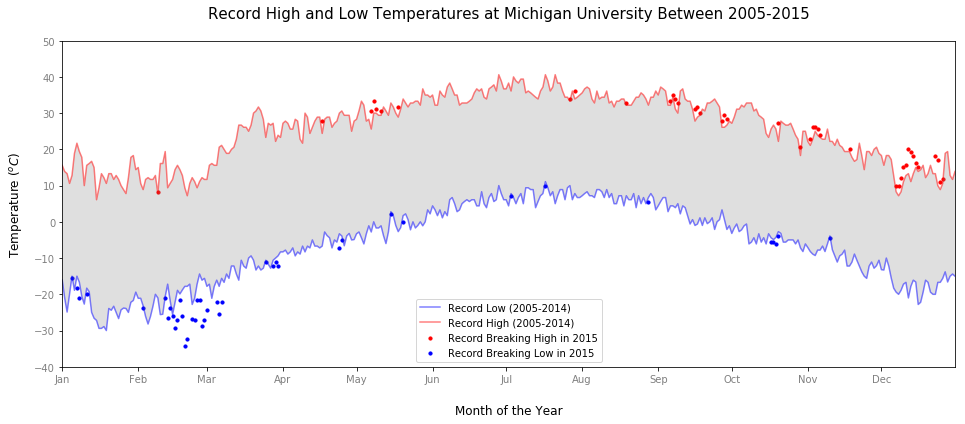

In [172]:
plt.figure(figsize=(16,6))

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_day_order = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

plt.xticks(month_day_order, months, alpha=0.5)
plt.yticks(alpha=0.5)
plt.xlabel("Month of the Year", fontsize=12, labelpad=20)
plt.ylabel("Temperature ($^oC$)", fontsize=12, labelpad=10)
plt.title("Record High and Low Temperatures at Michigan University Between 2005-2015", fontsize=15, y=1.05)


plt.plot(temp_min_plot[0], temp_min_plot[1], 'b', temp_max_plot[0], temp_max_plot[1], 'r', alpha=0.5)
scat_high = plt.scatter(list(record_high["day number"]), list(record_high["Max 2015"]),c='r',s=10)
scat_low = plt.scatter(list(record_low["day number"]), list(record_low["Min 2015"]),c='b',s=10)
plt.gca().fill_between(range(len(temp_min_plot[0])), temp_min_plot[1], temp_max_plot[1], facecolor='gray', alpha=0.25)

plt.legend(["Record Low (2005-2014)", "Record High (2005-2014)", "Record Breaking High in 2015", "Record Breaking Low in 2015"], loc=8)
ax = plt.gca()
ax.axis([0,364,-40,50])

plt.show()

# compiled

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

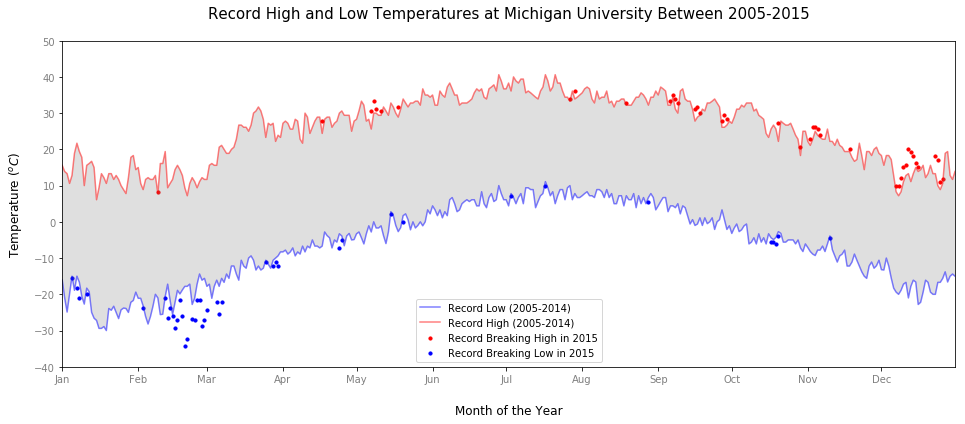

In [2]:
# Importing data, Sorting by data, and converting tenth degrees to degrees.
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df["Date"] = df["Date"].astype('datetime64[D]')
df.sort_values(by="Date", ascending=True, inplace=True)
df["Data_Value"] = df["Data_Value"] / 10

# Creating a df of the minimum temps found between 2005-2014
temp_min = df[(df["Element"]=="TMIN") & (df["Date"]<="2014")][["Date","Data_Value"]]
temp_min["day of year"] = temp_min["Date"].dt.strftime("%m-%d")
temp_min_day = temp_min.groupby("day of year").agg({"Data_Value":np.min})
temp_min_day["day of year"] = temp_min_day.index
# removing leap year data.
temp_min_day = temp_min_day[temp_min_day["day of year"] != "02-29"]
temp_min_day.drop("day of year", axis=1, inplace=True)

# Creating a df of the maximum temps found between 2005-2014.
temp_max = df[(df["Element"]=="TMAX") & (df["Date"]<="2014")][["Date","Data_Value"]]
temp_max["day of year"] = temp_max["Date"].dt.strftime("%m-%d")
temp_max_day = temp_max.groupby("day of year").agg({"Data_Value":np.max})
temp_max_day["day of year"] = temp_max_day.index
# removing leap year data.
temp_max_day = temp_max_day[temp_max_day["day of year"] != "02-29"]
temp_max_day.drop("day of year", axis=1, inplace=True)

# Create list arrays of the above df's
temp_min_plot = [list(range(365)),list(temp_min_day["Data_Value"])]
temp_max_plot = [list(range(365)),list(temp_max_day["Data_Value"])]

# Create df of record breaking minimum temps in 2015
min2015 = df[(df["Element"]=="TMIN") & (df["Date"]>="2015")][["Date","Data_Value"]]
min2015["day of year"] = min2015["Date"].dt.strftime("%m-%d")
min2015_day = min2015.groupby("day of year").agg({"Data_Value":np.min})

# Create df of record breaking maximum temps in 2015
max2015 = df[(df["Element"]=="TMAX") & (df["Date"]>="2015")][["Date","Data_Value"]]
max2015["day of year"] = max2015["Date"].dt.strftime("%m-%d")
max2015_day = max2015.groupby("day of year").agg({"Data_Value":np.max})

# Merging all above dfs together (this was done for my visulization)
df_2015 = pd.merge(min2015_day, max2015_day, how="outer", left_index=True, right_index=True)
df_2015.columns = ["Min 2015","Max 2015"]

df_2005_2014 = pd.merge(temp_min_day, temp_max_day, how="outer", left_index=True, right_index=True)
df_2005_2014.columns = ["Min 2005-2014","Max 2005-2014"]

df_comp = pd.merge(df_2005_2014, df_2015, how="outer", left_index=True, right_index=True)

df_comp["day of year"] = df_comp.index
df_comp = df_comp[df_comp["day of year"] != "02-29"]
df_comp.drop("day of year", axis=1, inplace=True)
df_comp["day number"] = range(0,len(df_comp))

# Crease df of record highs in 2015
record_high = df_comp[df_comp["Max 2015"] > df_comp["Max 2005-2014"]][["Max 2015","day number"]]

# Crease df of record lows in 2015
record_low = df_comp[df_comp["Min 2015"] < df_comp["Min 2005-2014"]][["Min 2015","day number"]]

# Plotting
plt.figure(figsize=(16,6))

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_day_order = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

plt.xticks(month_day_order, months, alpha=0.5)
plt.yticks(alpha=0.5)
plt.xlabel("Month of the Year", fontsize=12, labelpad=20)
plt.ylabel("Temperature ($^oC$)", fontsize=12, labelpad=10)
plt.title("Record High and Low Temperatures at Michigan University Between 2005-2015", fontsize=15, y=1.05)


plt.plot(temp_min_plot[0], temp_min_plot[1], 'b', temp_max_plot[0], temp_max_plot[1], 'r', alpha=0.5)
scat_high = plt.scatter(list(record_high["day number"]), list(record_high["Max 2015"]),c='r',s=10)
scat_low = plt.scatter(list(record_low["day number"]), list(record_low["Min 2015"]),c='b',s=10)
plt.gca().fill_between(range(len(temp_min_plot[0])), temp_min_plot[1], temp_max_plot[1], facecolor='gray', alpha=0.25)

plt.legend(["Record Low (2005-2014)", "Record High (2005-2014)", "Record Breaking High in 2015", "Record Breaking Low in 2015"], loc=8)
ax = plt.gca()
ax.axis([0,364,-40,50])

plt.show()